In [579]:
from nltk.tokenize import sent_tokenize, word_tokenize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from gensim.models import Word2Vec
import gensim 

from  nltk import FreqDist

In [580]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
#nltk.download('genesis')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
genesis_ic = wn.ic(genesis, False, 0.0)
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
from random import randint

In [581]:
#read in one dataset
df=pd.read_csv('epicurious')

In [582]:
df=df.dropna()

In [583]:
df.ingredients.head(10)

1     ['1 1/2 cups whipping cream', '2 medium onions...
5     ['2 1/2 cups (lightly packed) fresh basil leav...
8     ['1/4 cup soy sauce', '1 tablespoon sugar', '2...
9     ['6 long parsley sprigs, divided', '1 3/4 cups...
10    ['4 teaspoons olive oil', '1/2 cup finely chop...
12    ['Nonstick vegetable oil spray', '3 cups all-p...
13    ['4 6- to 7-ounce beef tenderloin steaks (each...
14    ['1 large ripe peach', '2 tablespoons sugar', ...
15    ['2 cups fresh tomato and/or carrot juice (fro...
16    ['1 cup water', '2/3 cup buttermilk', '1/3 cup...
Name: ingredients, dtype: object

In [584]:
df=df.reset_index(drop=True)

In [585]:
df.head()

Unnamed: 0  calories                                         categories  \
0           1     403.0  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
1           5     948.0  ['Sandwich', 'Food Processor', 'Tomato', 'Kid-...   
2           8     170.0  ['Beef', 'Ginger', 'Sauté', 'Stir-Fry', 'Quick...   
3           9     602.0  ['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...   
4          10     256.0  ['Milk/Cream', 'Dairy', 'Side', 'Thanksgiving'...   

                      date                                               desc  \
0  2004-08-20 04:00:00.000  This uses the same ingredients found in boudin...   
1  2004-08-20 04:00:00.000  This recipe can be prepared in 45 minutes or l...   
2  2004-08-20 04:00:00.000                                            Bulgogi   
3  2008-10-23 22:24:26.000  Transform your picnic into un pique-nique to r...   
4  2004-08-20 04:00:00.000  Simmering the yams fills them with flavor and ...   

                                          directions   fat  \
0  ['Combine first 9 ingredients in heavy medium ...  23.0   
1  ['Mix basil, mayonnaise and butter in processo...  79.0   
2  ['Stir together soy sauce, sugar, sesame oil, ...  10.0   
3  ['Chop enough parsley leaves to measure 1 tabl...  41.0   
4  ['Heat oil in heavy large skillet over medium-...   5.0   

                                         ingredients  protein  rating  sodium  \
0  ['1 1/2 cups whipping cream', '2 medium onions...     18.0   4.375  1439.0   
1  ['2 1/2 cups (lightly packed) fresh basil leav...     19.0   4.375  1042.0   
2  ['1/4 cup soy sauce', '1 tablespoon sugar', '2...      7.0   4.375  1272.0   
3  ['6 long parsley sprigs, divided', '1 3/4 cups...     23.0   3.750  1696.0   
4  ['4 teaspoons olive oil', '1/2 cup finely chop...      4.0   3.750    30.0   

                                               title  
0        Boudin Blanc Terrine with Red Onion Confit   
1                                     The Best Blts   
2                             Korean Marinated Beef   
3  Ham Persillade with Mustard Potato Salad and M...  
4      Yams Braised with Cream, Rosemary and Nutmeg

In [586]:
# get stop words
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

In [587]:
#use string library
import string

In [588]:
#add punctuation to stopwords list
stopwords_list += list(string.punctuation)

In [1327]:
#add words that aren't in the NLTK stopwords list
stopwords_list += ['unsalted','grated','minced','ground','thinly','ounces','finely','black','red','white','plus','whole','coursely','cup','kosher','lb','oz','diced','sliced','pitted','peeled','seasoned','teaspoon','teaspoons','tablespoons', 'tablespoon', 'pound','cups','half','salt','pepper','chopped','bowl','directions','preheat','pieces','sliced','fresh','freshly','bunch','cut']
stopwords_list+=['drained','baking','coarsely','stick','green','packed','all-purpose','room','temperature','1/2-inch','''''','pounds','dry','divided','halved','trimmed','slices','1/2-inch-thick','1/4-inch-thick','s','12','1','2','3','4','5','6','7','8','9','1/2','1/3','1/4','2/3','3/4','1/8','small','large','medium']

stopwords_list += ["''"]

In [1328]:
def process_article(article):
    tokens = word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed 

In [1329]:
#df['a'] = df['a'].apply(lambda x: x + 1)
df['Ingredient_join']=df['ingredients'].apply(lambda x:' '.join(x))
 
# df['ingredients'].astype(str).str.cat(df['ingredients'],sep=' ')

In [1330]:
def process_sent(article):
    tokens = sent_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed 

In [1331]:
#vectorize_list=df['Ingredient_join'].apply(lambda x: process_article(x))

In [1332]:
df['processed_titles']=df['title'].apply(lambda x: process_article(x))

In [1333]:
df['title_join']=df['processed_titles'].apply(lambda x:' '.join(x))

In [1334]:
vectorize_title=df['title_join'].apply(lambda x: process_article(x))

In [1335]:
# this is the best format so far
df['processed_ingredients']=df['ingredients'].apply(lambda x: process_article(x))

In [1336]:
df['ingredients_join']=df['processed_ingredients'].apply(lambda x:' '.join(x))

In [1337]:
df['processed_directions']=df['directions'].apply(lambda x: process_article(x))

In [1338]:
df['directions_join']=df['processed_directions'].apply(lambda x:' '.join(x))

In [1339]:
# i think this is the tokenized directions
df['processed_directions'].head()

0    ['combine, first, ingredients, heavy, saucepan...
1    ['mix, basil, mayonnaise, butter, processor, b...
2    ['stir, together, soy, sauce, sugar, sesame, o...
3    ['chop, enough, parsley, leaves, measure, rese...
4    ['heat, oil, heavy, skillet, medium-high, heat...
Name: processed_directions, dtype: object

In [1340]:
df['recipe_combo']=df['processed_titles']+df['processed_ingredients']+df['processed_directions']

In [850]:
#df['vector_ingred_lines']=df['processed_ingredients'].apply(lambda x: model_5[x])

In [851]:
# created list of words and counts for freqDist counter
articles_concat = []
for article in df['processed_ingredients']:
    articles_concat += article

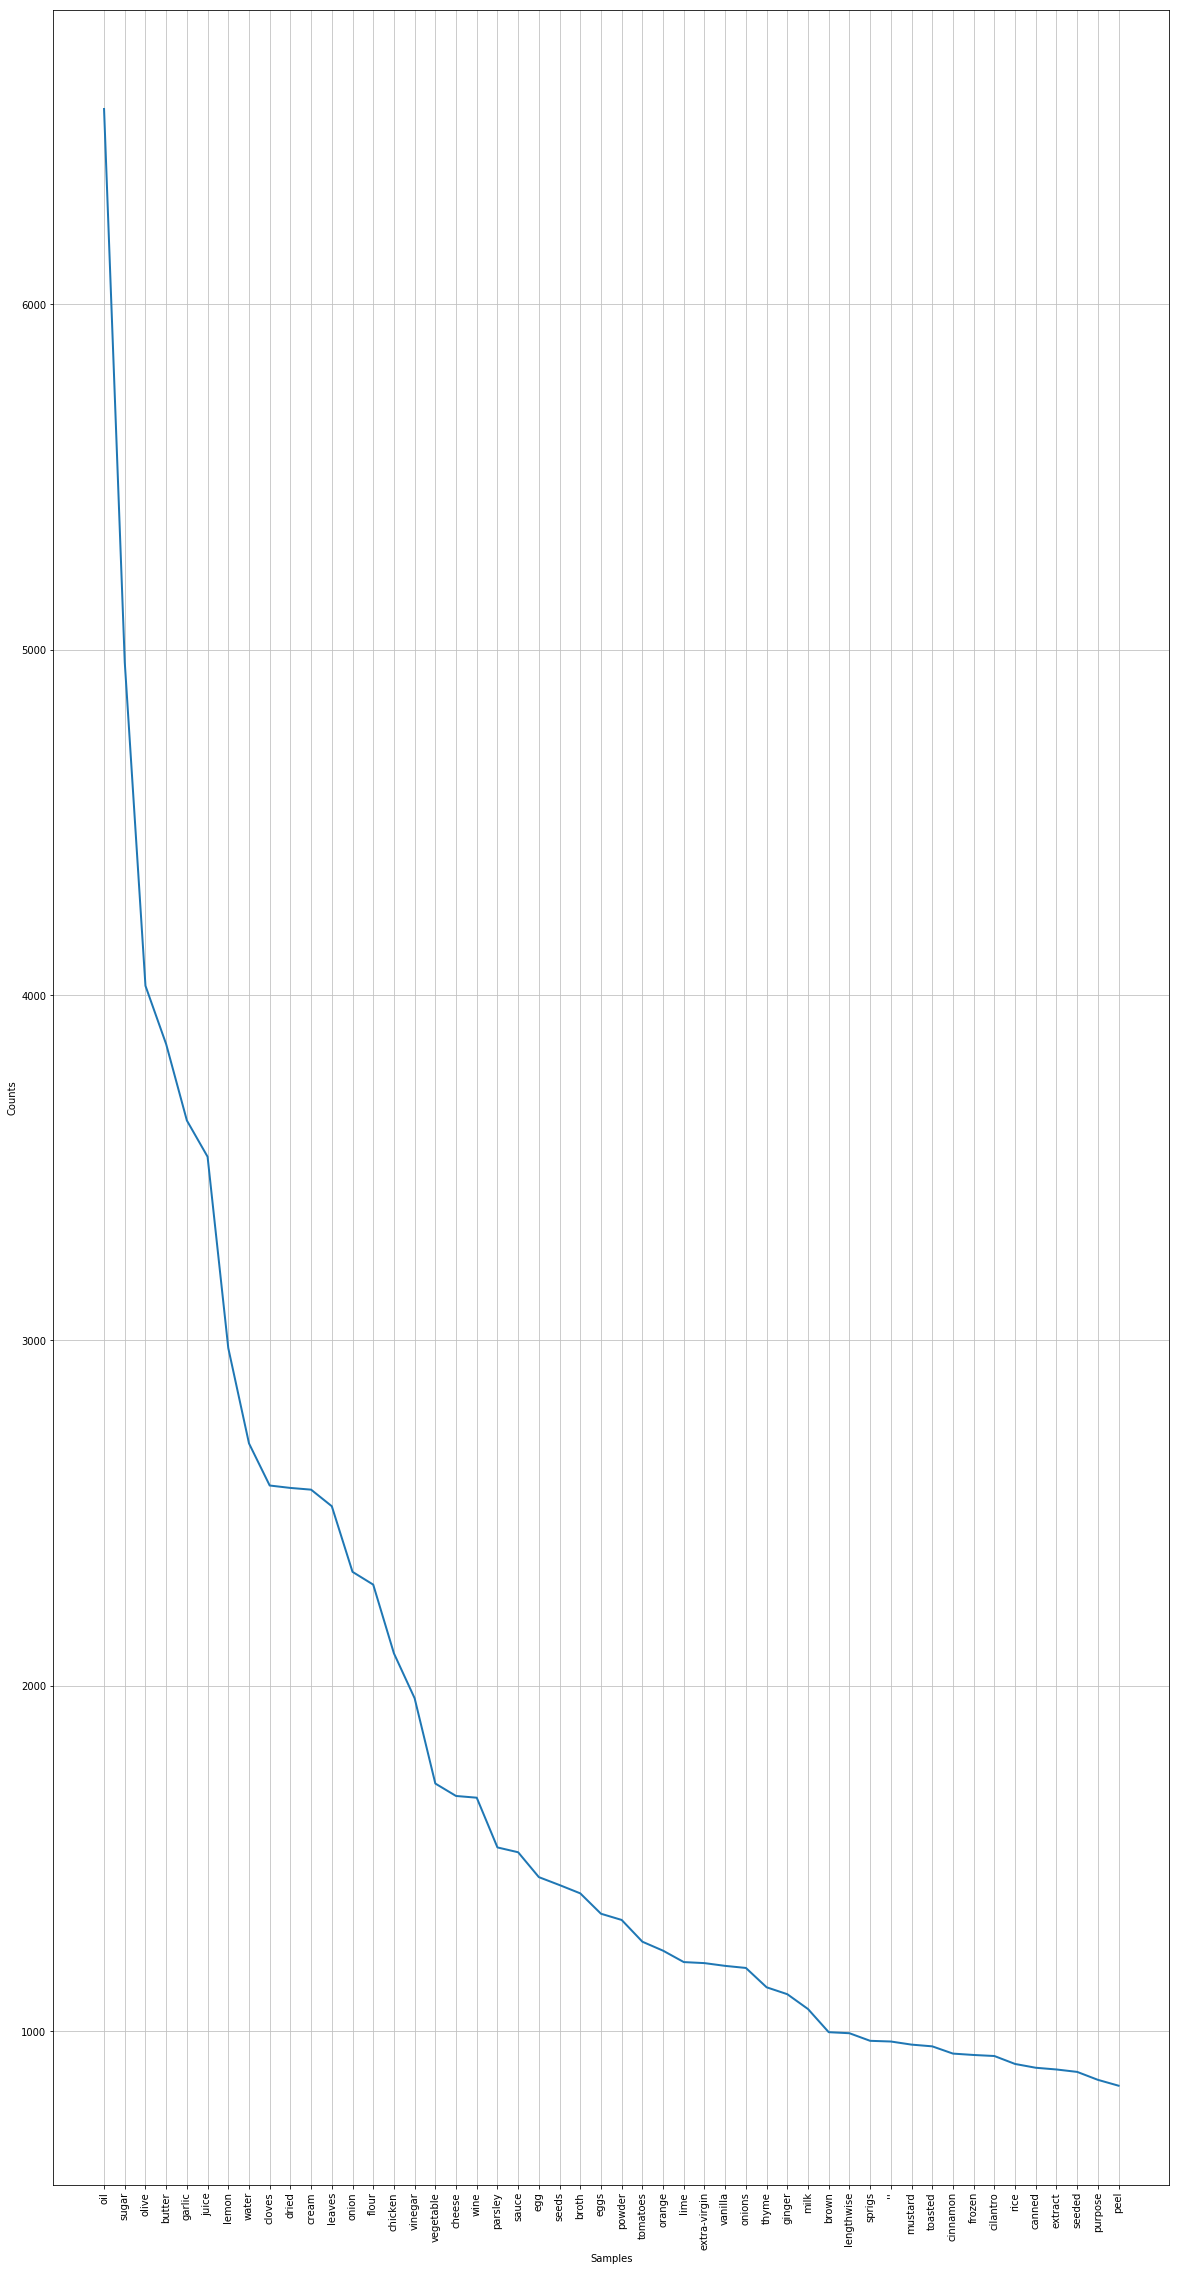

In [852]:
frequency=FreqDist(articles_concat)


plt.figure(figsize=(20, 40)) 
frequency.plot(50)

In [890]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import Counter

In [894]:
word_list=Counter(articles_concat).most_common(100)

In [902]:
#create string of words for word cloud
test_word=''
for word in articles_concat:
    test_word+=' '
    test_word+=word

In [903]:
test_word

" whipping cream onions bay leaves cloves garlic clove crushed nutmeg 'pinch dried thyme crumbled shallots butter boneless center pork loin sinew removed 1-inch chunks well chilled eggs purpose flour tawny port dried currants 'lettuce leaves 'cracked peppercorns 'minced parsley 'bay leaves 'french bread baguette olive oil onions dried currants wine vinegar canned chicken broth thyme dried crumbled sugar lightly basil leaves mayonnaise butter '12 thick-sliced bacon strips '12 country-style bread tomatoes rounds ripe avocados onion lettuce leaves soy sauce sugar asian sesame oil scallions pale parts separated greens garlic ginger sesame seeds toasted flank steak across grain thin inch thick vegetable oil 'accompaniments butter lettuce soft-leaf lettuce garlic packaged kimchi* steamed rice long parsley sprigs reduced-sodium chicken broth garlic clove unflavored gelatin envelope water 3/4-pound piece baked ham cubes mayonnaise dijon mustard white-wine vinegar celery ribs cornichons sour gh

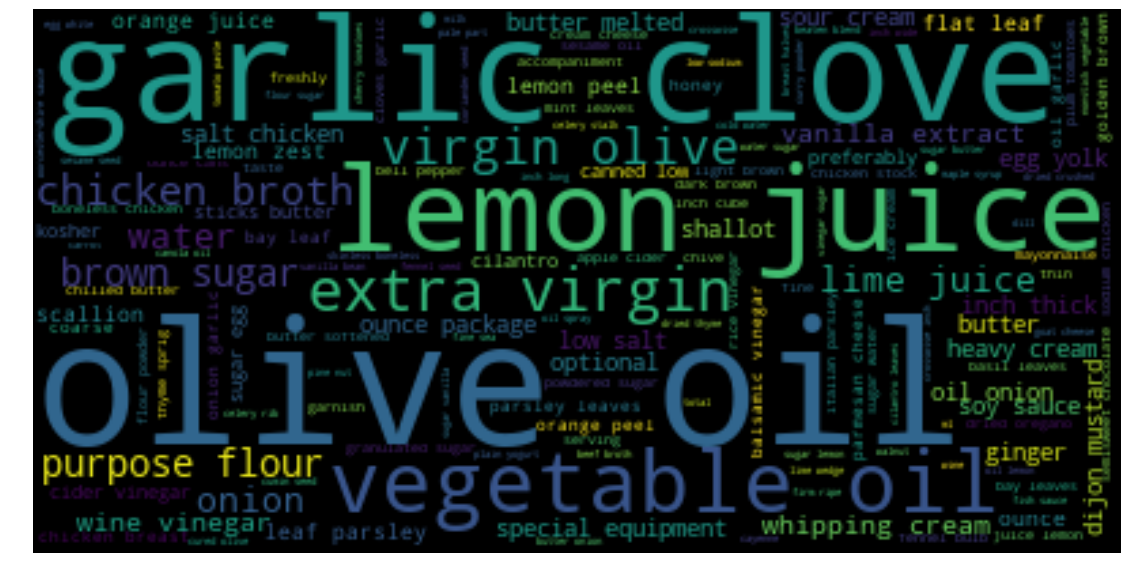

In [913]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(test_word)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [604]:
df.head()

Unnamed: 0  calories                                         categories  \
0           1     403.0  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
1           5     948.0  ['Sandwich', 'Food Processor', 'Tomato', 'Kid-...   
2           8     170.0  ['Beef', 'Ginger', 'Sauté', 'Stir-Fry', 'Quick...   
3           9     602.0  ['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...   
4          10     256.0  ['Milk/Cream', 'Dairy', 'Side', 'Thanksgiving'...   

                      date                                               desc  \
0  2004-08-20 04:00:00.000  This uses the same ingredients found in boudin...   
1  2004-08-20 04:00:00.000  This recipe can be prepared in 45 minutes or l...   
2  2004-08-20 04:00:00.000                                            Bulgogi   
3  2008-10-23 22:24:26.000  Transform your picnic into un pique-nique to r...   
4  2004-08-20 04:00:00.000  Simmering the yams fills them with flavor and ...   

                                          directions   fat  \
0  ['Combine first 9 ingredients in heavy medium ...  23.0   
1  ['Mix basil, mayonnaise and butter in processo...  79.0   
2  ['Stir together soy sauce, sugar, sesame oil, ...  10.0   
3  ['Chop enough parsley leaves to measure 1 tabl...  41.0   
4  ['Heat oil in heavy large skillet over medium-...   5.0   

                                         ingredients  protein  rating  sodium  \
0  ['1 1/2 cups whipping cream', '2 medium onions...     18.0   4.375  1439.0   
1  ['2 1/2 cups (lightly packed) fresh basil leav...     19.0   4.375  1042.0   
2  ['1/4 cup soy sauce', '1 tablespoon sugar', '2...      7.0   4.375  1272.0   
3  ['6 long parsley sprigs, divided', '1 3/4 cups...     23.0   3.750  1696.0   
4  ['4 teaspoons olive oil', '1/2 cup finely chop...      4.0   3.750    30.0   

                                               title  \
0        Boudin Blanc Terrine with Red Onion Confit    
1                                     The Best Blts    
2                             Korean Marinated Beef    
3  Ham Persillade with Mustard Potato Salad and M...   
4      Yams Braised with Cream, Rosemary and Nutmeg    

                                     Ingredient_join  \
0  [ ' 1   1 / 2   c u p s   w h i p p i n g   c ...   
1  [ ' 2   1 / 2   c u p s   ( l i g h t l y   p ...   
2  [ ' 1 / 4   c u p   s o y   s a u c e ' ,   ' ...   
3  [ ' 6   l o n g   p a r s l e y   s p r i g s ...   
4  [ ' 4   t e a s p o o n s   o l i v e   o i l ...   

                                    processed_titles  \
0       [boudin, blanc, terrine, red, onion, confit]   
1                                  [the, best, blts]   
2                          [korean, marinated, beef]   
3  [ham, persillade, mustard, potato, salad, mash...   
4           [yams, braised, cream, rosemary, nutmeg]   

                                        title_join  \
0            boudin blanc terrine red onion confit   
1                                    the best blts   
2                            korean marinated beef   
3  ham persillade mustard potato salad mashed peas   
4               yams braised cream rosemary nutmeg   

                               processed_ingredients  \
0  [whipping, cream, onions, bay, leaves, whole, ...   
1  [lightly, packed, basil, leaves, mayonnaise, b...   
2  [soy, sauce, sugar, asian, sesame, oil, scalli...   
3  [long, parsley, sprigs, divided, reduced-sodiu...   
4  [olive, oil, finely, shallots, minced, rosemar...   

                                    ingredients_join  \
0  whipping cream onions bay leaves whole cloves ...   
1  lightly packed basil leaves mayonnaise butter ...   
2  soy sauce sugar asian sesame oil scallions whi...   
3  long parsley sprigs divided reduced-sodium chi...   
4  olive oil finely shallots minced rosemary poun...   

                                processed_directions  \
0  ['combine, first, ingredients, heavy, saucepan...   
1  ['mix, basil, mayonnaise, butter, processor, b...   
2  ['stir

In [853]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec

model_combo = Word2Vec(df['recipe_combo'], min_count=1)

In [854]:
test_run=df[df['ingredients'].str.contains('buttermilk')]

In [855]:
test_run=test_run.reset_index(drop=True)

In [856]:
test_run

Unnamed: 0  calories                                         categories  \
0            16     146.0  ['Bread', 'Milk/Cream', 'Breakfast', 'Brunch',...   
1            29     311.0  ['Fruit', 'Dessert', 'Bake', 'Apricot', 'Cherr...   
2            57     223.0  ['Breakfast', 'Brunch', 'Bake', 'Thanksgiving'...   
3            63     523.0  ['Cake', 'Molasses', 'Buttermilk', 'Bake', 'Co...   
4           132     451.0  ['Side', 'Vegetarian', 'Spinach', 'Oktoberfest...   
5           277     179.0  ['Ice Cream Machine', 'Dairy', 'Ginger', 'Dess...   
6           296     145.0  ['Soup/Stew', 'Appetizer', 'Picnic', 'Vegetari...   
7           355     124.0  ['Bread', 'Food Processor', 'Brunch', 'Side', ...   
8           378     860.0  ['Cake', 'Mixer', 'Dessert', 'Bake', 'Cream Ch...   
9           419     405.0  ['Cake', 'Dessert', 'Kid-Friendly', 'Blueberry...   
10          424     101.0  ['Salad', 'Cheese', 'Vegetable', 'Appetizer', ...   
11          575     310.0  ['Cake', 'Dairy', 'Egg', 'Dessert', 'Bake', 'L...   
12          656     219.0  ['Soup/Stew', 'Vegetable', 'No-Cook', 'Yogurt'...   
13          694     437.0  ['Fruit', 'Breakfast', 'Brunch', 'Raspberry', ...   
14          762     355.0  ['Cake', 'Birthday', 'Buttermilk', 'Cream Chee...   
15          853     484.0  ['Milk/Cream', 'Breakfast', 'Bake', 'Jam or Je...   
16          947    1401.0  ['Bread', 'Milk/Cream', 'Egg', 'Side', 'Bake',...   
17         1037     738.0  ['Bon Appétit', 'Cake', 'Carrot', 'Spring', 'S...   
18         1051     288.0  ['Bread', 'Healthy', 'Quinoa', 'Whole Wheat', ...   
19         1121     101.0  ['Salad', 'Cheese', 'Vegetable', 'Appetizer', ...   
20         1161     730.0  ['Cake', 'Chocolate', 'Dessert', 'Bake', 'Cinc...   
21         1199     326.0  ['Milk/Cream', 'Egg', 'Ginger', 'Breakfast', '...   
22         1280      88.0  ['Appetizer', 'Side', 'Fry', 'Goat Cheese', 'B...   
23         1332     141.0  ['Milk/Cream', 'Fruit', 'Breakfast', 'Brunch',...   
24         1426    1855.0  ['Chicken', 'Garlic', 'Spice', 'Pan-Fry', 'Bon...   
25         1458     433.0  ['Bon Appétit', 'Broccoli', 'Quinoa', 'Herb', ...   
26         1499     635.0  ['Cake', 'Milk/Cream', 'Mixer', 'Chocolate', '...   
27         1634     419.0  ['#CAKEWEEK', 'Cake', 'Chocolate', "Father's D...   
28         1738     383.0  ['Cake', 'Milk/Cream', 'Chocolate', 'Egg', 'De...   
29         1778     241.0  ['Bread', 'Bake', 'Super Bowl', 'Vegetarian', ...   
..          ...       ...                                                ...   
229       18422     602.0  ['Bread', 'Brunch', 'Dessert', 'Bake', 'Thanks...   
230       18459     201.0  ['Condiment/Spread', 'Citrus', 'Dairy', 'Quick...   
231       18629      53.0  ['Soup/Stew', 'Dairy', 'Onion', 'Vegetable', '...   
232       18706     437.0  ['Salad', 'Onion', 'Tomato', 'Side', 'No-Cook'...   
233       18742     383.0  ['Bread', 'Milk/Cream', 'Breakfast', 'Dessert'...   
234       18839     221.0  ['HarperCollins', 'Salad', 'Vegetarian', 'Fenn...   
235       18917     270.0  ['Soup/Stew', 'Milk/Cream', 'Blender', 'Freeze...   
236       19031     200.0  ['Soup/Stew', 'Winter', 'Fall', 'Cabbage', 'Wa...   
237       19033     189.0  ['Bread', 'Fruit', 'Nut', 'Breakfast', 'Brunch...   
238       19111     289.0  ['Bon Appétit', 'Bread', 'Cornmeal', 'Buttermi...   
239       19122     350.0  ['Biscuit', 'Kid-Friendly', 'Side', 'Sugar Con...   
240       19172     359.0  ['Cake', 'Bourbon', 'Milk/Cream', 'Dessert', '...   
241       19176     340.0  ['Chicken', 'Pepper', 'Poultry', 'Sauté', 'Cor...   
242       19200     468.0  ['Mushroom', 'Bake', 'Christmas', 'Thanksgivin...   
243       19217     330.0  ['Chocolate', 'Dessert', 'Bake', 'Kid-Friendly...   
244       19244     312.0  ['Bread', 'Bake', 'Cornmeal', 'Fall', 'Bon App...   
245       19293     405.0  ['Cake', 'Dessert', 'Kid-Friendly', 'Blueberry...   
246       19312     315.0  ['Cake', 'Ginger', 'Breakfast', 'Brunch', 'Des...   
247  

In [857]:

item=randint(0,(len(test_run)-1))

In [858]:
item

109

In [859]:
test_ingredients=test_run['processed_ingredients'][item]

In [1226]:
test_ingredients

In [861]:
key=test_ingredients[0]

In [862]:
key

'flour'

In [863]:
test_run.iloc[item]

Unnamed: 0                                                            7991
calories                                                              3610
categories               ['Bread', 'Food Processor', 'Breakfast', 'Brun...
date                                               2008-12-12 04:00:00.000
desc                     This recipe is for baking at sea level. Howeve...
directions               ['Position rack in center of oven. Preheat ove...
fat                                                                    119
ingredients              ['2 cups all-purpose flour', '1 1/2 teaspoons ...
protein                                                                 57
rating                                                                   0
sodium                                                                2455
title                                           Apricot-Almond Gift Bread 
Ingredient_join          [ ' 2   c u p s   a l l - p u r p o s e   f l ...
processed_titles         

In [864]:
answer=model_combo.most_similar(positive=[test_ingredients[0]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [865]:
final=answer[0][0]

In [866]:
key

'flour'

In [867]:
similar_words=model_combo.most_similar(positive=[key])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [868]:
similar_words

[('cornmeal', 0.7198002934455872),
 ('soda', 0.6882820129394531),
 ('flours', 0.655887246131897),
 ("'walnut-streusel", 0.6155778765678406),
 ('cajun-creole', 0.6022316217422485),
 ('oats', 0.5865286588668823),
 ('cocoa', 0.5836431980133057),
 ('meal', 0.5735413432121277),
 ('matzo', 0.5654301643371582),
 ('tablespoon-sized', 0.5567840337753296)]

In [869]:
similar_list=[]
words=[]
for word in range(1,len(similar_words)):
    similar_list.append(model_combo.similarity(similar_words[word][0], final))
    words.append(similar_words[word][0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


In [870]:
layered_relationships=dict(zip(words,similar_list))

In [871]:
layered_relationships

{'soda': 0.68074113,
 'flours': 0.62102616,
 "'walnut-streusel": 0.57705575,
 'cajun-creole': 0.5983081,
 'oats': 0.56445086,
 'cocoa': 0.6252346,
 'meal': 0.54882246,
 'matzo': 0.5478856,
 'tablespoon-sized': 0.4636279}

In [872]:
final_2 = max(layered_relationships.keys(), key=(lambda k: layered_relationships[k]))

In [873]:
final_2

'soda'

In [874]:
test_run.iloc[item]['title'],test_run.iloc[item]['ingredients']

('Apricot-Almond Gift Bread ',
 '[\'2 cups all-purpose flour\', \'1 1/2 teaspoons baking powder\', \'1/2 teaspoon baking soda\', \'1/2 teaspoon salt\', \'1 cup granulated sugar\', \'3 tablespoons wheat germ\', \'1 cup dried apricots (moist-style)\', \'1/2 cup (2 1/2 ounces) blanched almonds\', \'1/3 cup canola or light olive oil\', \'1 large egg, at room temperature\', \'3/4 cup apricot nectar or buttermilk\', \'1 teaspoon almond extract\', \'1 teaspoon vanilla extract\', "2/3 cup sifted confectioners\' sugar", \'2 to 3 tablespoons milk, water, or fruit juice (or as needed)\', \'Special Equipment: 9- by 5- by 3-inch loaf pan or three 5 3/4- by 3 1/4- by 2-inch baby loaf pans; food processor and kitchen shears or cutting board and knife; wooden skewer or cake tester.\', \'Pan Preparation: Butter the pan(s) or spray with butter-flavor nonstick vegetable spray and dust with flour. Tap out the excess flour.\']')

In [875]:
key

'flour'

In [876]:
test_run.iloc[item]['title'], test_run.iloc[item]['directions'].replace(key,final_2), test_run.iloc[item]['ingredients'].replace(key,final_2)

('Apricot-Almond Gift Bread ',
 '[\'Position rack in center of oven. Preheat oven to 350°F. Bake large loaf 60 to 65 minutes, baby loaves 40 to 45 minutes. Prepare pan(s) as directed.\', \'In a large bowl, whisk together the soda, baking powder, baking soda, salt, sugar, and wheat germ. If using a food processor, add the apricots and a generous tablespoon of the soda mixture to the bowl and pulse until the fruit is cut into small (1/4-inch) bits. Or, cut up the apricots with oiled kitchen shears or an oiled knife. Scrape the apricot bits into the bowl with the soda. Chop the nuts and add them to the dry ingredients.\', "In a medium bowl, whisk together the oil, egg, nectar or buttermilk, and extracts. Make a well in the middle of the dry ingredients and pour in the oil-egg mixture. Whisk or stir just to blend well; don\'t over mix.", \'Scrape the batter into the prepared pan(s), filling them about two-thirds full. Bake 60 to 65 minutes for a large loaf, 40 to 45 minutes for small loave

In [1385]:
practice=['flour']

In [1388]:
aim=model_combo.predict_output_word(practice[-1])
practice.append(aim[0][0])

In [1389]:
aim

[('less-cooked', 7.786463e-05),
 ("'**pomegranate", 7.734946e-05),
 ('\\xa0shops', 7.696835e-05),
 ('pecan-bourbon', 7.658036e-05),
 ('gloria-style', 7.6517106e-05),
 ('horseradish-glazed', 7.617709e-05),
 ('5x2', 7.610971e-05),
 ('kingarthurflour.com', 7.610841e-05),
 ('href+105622', 7.593552e-05),
 ('pear-brandy', 7.583429e-05)]

In [877]:
model_combo.similarity(['yellow'], 'red-pepper')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


array([0.15634158], dtype=float32)

In [1326]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [1225]:
model_combo.most_similar(positive=[food])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('chicken', 1.0),
 ('duck', 0.6754660606384277),
 ('turkey', 0.6191043853759766),
 ('breasts', 0.5939856767654419),
 ('chickens', 0.5669748783111572),
 ('3-6', 0.5578491687774658),
 ('breast', 0.5577871203422546),
 ('quail', 0.5530011057853699),
 ('garlic-curry', 0.5522576570510864),
 ('thighs', 0.5512781143188477)]

In [1130]:
#df['recipe_combo'][0]

In [968]:
model_combo['cheese']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-2.3792133e+00, -2.0208721e+00,  7.6020777e-01,  4.9192312e-01,
       -1.3301651e+00,  2.1882467e-01, -7.5843161e-01, -8.3591282e-01,
       -4.7965425e-01,  5.0670460e-02, -6.4555836e-01,  1.5768726e+00,
        3.3189180e-01,  1.0370297e+00, -1.7617899e-01, -6.6486019e-01,
       -3.8239545e-01, -1.9010024e-04,  7.3745900e-01,  1.9872608e+00,
        2.1766877e+00,  7.3045433e-01, -9.2799000e-02, -1.4472516e+00,
        1.2274152e+00, -8.2745737e-01, -1.3824905e+00, -1.1527233e+00,
       -1.4890203e+00,  1.6072706e+00,  7.7454692e-01,  1.2215441e+00,
       -1.7340103e-01, -2.8788182e-01, -1.6842917e+00,  1.7641354e+00,
       -1.5791830e+00, -1.4803590e-01, -8.9532785e-02, -2.2105834e+00,
       -1.8583174e-01, -1.8082905e+00, -3.4706910e+00,  2.5118275e+00,
       -6.0137737e-01,  1.6008900e+00,  1.2499121e+00,  1.1965421e+00,
       -4.3964589e-01,  2.8339658e+00, -1.6754589e+00,  1.2593017e+00,
        1.3539695e+00, -5.7135874e-01,  1.5720085e+00, -2.8530734e+00,
      

In [969]:
rob=df['recipe_combo'].apply(lambda x: model_combo[x])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [971]:
rob[0].shape

(224, 100)

In [1217]:
food_test=['chicken','basil','parmesan','flour','red sauce']

In [1219]:
foody=[lambda x: sum(model_combo(x)),food_test]

In [1221]:
dinner=[]
for food in range(len(food_test)):
    dinner.append(model_combo[food_test[x]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


'chicken'

In [1224]:
food=sum(dinner)

In [918]:
df['recipe_vector']=df['recipe_combo'].apply(lambda x: sum(model_combo[x]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [922]:
recipe=df[['title','recipe_vector']]

In [964]:
df['recipe_combo'][0]

['boudin',
 'blanc',
 'terrine',
 'red',
 'onion',
 'confit',
 'whipping',
 'cream',
 'onions',
 'bay',
 'leaves',
 'cloves',
 'garlic',
 'clove',
 'crushed',
 'nutmeg',
 "'pinch",
 'dried',
 'thyme',
 'crumbled',
 'shallots',
 'butter',
 'boneless',
 'center',
 'pork',
 'loin',
 'sinew',
 'removed',
 '1-inch',
 'chunks',
 'well',
 'chilled',
 'eggs',
 'purpose',
 'flour',
 'tawny',
 'port',
 'dried',
 'currants',
 "'lettuce",
 'leaves',
 "'cracked",
 'peppercorns',
 "'minced",
 'parsley',
 "'bay",
 'leaves',
 "'french",
 'bread',
 'baguette',
 'olive',
 'oil',
 'onions',
 'dried',
 'currants',
 'wine',
 'vinegar',
 'canned',
 'chicken',
 'broth',
 'thyme',
 'dried',
 'crumbled',
 'sugar',
 "'combine",
 'first',
 'ingredients',
 'heavy',
 'saucepan',
 'add',
 'shallots',
 'bring',
 'simmer',
 'remove',
 'heat',
 'cover',
 'let',
 'stand',
 '30',
 'minutes',
 'chill',
 'overnight',
 "'preheat",
 'oven',
 '325°f',
 'line',
 '7-cup',
 'pâté',
 'bread',
 'pan',
 'plastic',
 'wrap',
 'melt'

In [716]:
vec=model_combo['parmesan']+model_combo['butter']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [957]:
df['ingredients'][1]

"['2 1/2 cups (lightly packed) fresh basil leaves', '1 cup mayonnaise', '1/4 cup butter, room temperature', '12 thick-sliced bacon strips (about 1 pound)', '12 1/2-inch-thick slices fresh country-style white bread', '3 large tomatoes, cut into 1/4-inch-thick rounds', '2 ripe avocados, pitted, peeled, sliced', '1 red onion, thinly sliced', '6 lettuce leaves']"

In [955]:
vec=recipe['recipe_vector'][1]

In [956]:
model_combo.most_similar([vec])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('herbs', 0.5981401205062866),
 ('croutons', 0.5810642838478088),
 ('basil', 0.5789308547973633),
 ('cheeses', 0.5766854286193848),
 ('remaining', 0.5649207234382629),
 ('zucchini', 0.5619066953659058),
 ('mayonnaise', 0.5550028681755066),
 ('parsley', 0.5527827143669128),
 ('chives', 0.5498992204666138),
 ('crisptender', 0.5469096899032593)]

In [ ]:
print (model_combo.similarity(['threads'], 'dried'))

In [ ]:
word2vec(FreqDistTfidfTransformerCountVectorizer)

In [728]:
CountVectorizer(df['recipe_combo'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=0        [boudin, blanc, terrine, red, onion, confit, w...
1        [the, best, blts, lightly, packed, basil, leav...
2        [korean, marinated, beef, soy, sauce, sugar, a...
3        [ham, persillade, mustard, potato, salad, mash...
4        [yams, braised, cream, rosemary, nutmeg, olive......  [baked, ham, marmalade-horseradish, glaze, 18-...
Name: recipe_combo, Length: 10608, dtype: object,
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [720]:
for w in model_combo.words:
    print(w,model_combo.words[w].count)

AttributeError: 'Word2Vec' object has no attribute 'words'

In [1274]:
model_combo.doesnt_match('combine flour'.split())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'combine'

In [1276]:
model_combo.most_similar('sauce')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('oz/125g', 0.526486337184906),
 ('relish', 0.4853737950325012),
 ('paste', 0.4785676598548889),
 ('hon-dashi', 0.47086167335510254),
 ('ketchup', 0.46635764837265015),
 ('sauces', 0.4643920063972473),
 ('glaze', 0.46133166551589966),
 ('3-grain', 0.46067014336586),
 ('sauce*', 0.45846080780029297),
 ('gravy', 0.4571756422519684)]

In [1275]:
model_combo.similar_by_word('sauce')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('oz/125g', 0.526486337184906),
 ('relish', 0.4853737950325012),
 ('paste', 0.4785676598548889),
 ('hon-dashi', 0.47086167335510254),
 ('ketchup', 0.46635764837265015),
 ('sauces', 0.4643920063972473),
 ('glaze', 0.46133166551589966),
 ('3-grain', 0.46067014336586),
 ('sauce*', 0.45846080780029297),
 ('gravy', 0.4571756422519684)]

In [731]:
df.head()

Unnamed: 0  calories                                         categories  \
0           1     403.0  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
1           5     948.0  ['Sandwich', 'Food Processor', 'Tomato', 'Kid-...   
2           8     170.0  ['Beef', 'Ginger', 'Sauté', 'Stir-Fry', 'Quick...   
3           9     602.0  ['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...   
4          10     256.0  ['Milk/Cream', 'Dairy', 'Side', 'Thanksgiving'...   

                      date                                               desc  \
0  2004-08-20 04:00:00.000  This uses the same ingredients found in boudin...   
1  2004-08-20 04:00:00.000  This recipe can be prepared in 45 minutes or l...   
2  2004-08-20 04:00:00.000                                            Bulgogi   
3  2008-10-23 22:24:26.000  Transform your picnic into un pique-nique to r...   
4  2004-08-20 04:00:00.000  Simmering the yams fills them with flavor and ...   

                                          directions   fat  \
0  ['Combine first 9 ingredients in heavy medium ...  23.0   
1  ['Mix basil, mayonnaise and butter in processo...  79.0   
2  ['Stir together soy sauce, sugar, sesame oil, ...  10.0   
3  ['Chop enough parsley leaves to measure 1 tabl...  41.0   
4  ['Heat oil in heavy large skillet over medium-...   5.0   

                                         ingredients  protein  rating  sodium  \
0  ['1 1/2 cups whipping cream', '2 medium onions...     18.0   4.375  1439.0   
1  ['2 1/2 cups (lightly packed) fresh basil leav...     19.0   4.375  1042.0   
2  ['1/4 cup soy sauce', '1 tablespoon sugar', '2...      7.0   4.375  1272.0   
3  ['6 long parsley sprigs, divided', '1 3/4 cups...     23.0   3.750  1696.0   
4  ['4 teaspoons olive oil', '1/2 cup finely chop...      4.0   3.750    30.0   

                                               title  \
0        Boudin Blanc Terrine with Red Onion Confit    
1                                     The Best Blts    
2                             Korean Marinated Beef    
3  Ham Persillade with Mustard Potato Salad and M...   
4      Yams Braised with Cream, Rosemary and Nutmeg    

                                     Ingredient_join  \
0  [ ' 1   1 / 2   c u p s   w h i p p i n g   c ...   
1  [ ' 2   1 / 2   c u p s   ( l i g h t l y   p ...   
2  [ ' 1 / 4   c u p   s o y   s a u c e ' ,   ' ...   
3  [ ' 6   l o n g   p a r s l e y   s p r i g s ...   
4  [ ' 4   t e a s p o o n s   o l i v e   o i l ...   

                                    processed_titles  \
0       [boudin, blanc, terrine, red, onion, confit]   
1                                  [the, best, blts]   
2                          [korean, marinated, beef]   
3  [ham, persillade, mustard, potato, salad, mash...   
4           [yams, braised, cream, rosemary, nutmeg]   

                                        title_join  \
0            boudin blanc terrine red onion confit   
1                                    the best blts   
2                            korean marinated beef   
3  ham persillade mustard potato salad mashed peas   
4               yams braised cream rosemary nutmeg   

                               processed_ingredients  \
0  [whipping, cream, onions, bay, leaves, whole, ...   
1  [lightly, packed, basil, leaves, mayonnaise, b...   
2  [soy, sauce, sugar, asian, sesame, oil, scalli...   
3  [long, parsley, sprigs, divided, reduced-sodiu...   
4  [olive, oil, finely, shallots, minced, rosemar...   

                                    ingredients_join  \
0  whipping cream onions bay leaves whole cloves ...   
1  lightly packed basil leaves mayonnaise butter ...   
2  soy sauce sugar asian sesame oil scallions whi...   
3  long parsley sprigs divided reduced-sodium chi...   
4  olive oil finely shallots minced rosemary poun...   

                                processed_directions  \
0  ['combine, first, ingredients, heavy, saucepan...   
1  ['mix, basil, mayonnaise, butter, processor, b...   
2  ['stir

In [740]:
tokens = df['processed_ingredients'].apply(lambda x: FreqDist(x))

In [ ]:
def recipe_vectorizer(stuff):
    test_list=[]
    for word in stuff:
        test_list.append(model_combo[word])
    return sum(test_list)

In [ ]:
df['recipe_combo'][0]

In [ ]:
recipe_vectorizer(df['recipe_combo'][0])

In [ ]:
sum(test_list)

In [ ]:
total_vocab = set()
for comment in texts:
    total_vocab.update(comment)
len(total_vocab)

In [744]:
articles_concat

['whipping',
 'cream',
 'onions',
 'bay',
 'leaves',
 'whole',
 'cloves',
 'garlic',
 'clove',
 'crushed',
 'ground',
 'nutmeg',
 "'pinch",
 'dried',
 'thyme',
 'crumbled',
 'shallots',
 'minced',
 'butter',
 'trimmed',
 'boneless',
 'center',
 'pork',
 'loin',
 'sinew',
 'removed',
 '1-inch',
 'chunks',
 'well',
 'chilled',
 'eggs',
 'purpose',
 'flour',
 'tawny',
 'port',
 'dried',
 'currants',
 'minced',
 "'lettuce",
 'leaves',
 "'cracked",
 'peppercorns',
 "'minced",
 'parsley',
 "'bay",
 'leaves',
 "'french",
 'bread',
 'baguette',
 'slices',
 'olive',
 'oil',
 'red',
 'onions',
 'halved',
 'dried',
 'currants',
 'red',
 'wine',
 'vinegar',
 'canned',
 'chicken',
 'broth',
 'thyme',
 'dried',
 'crumbled',
 'sugar',
 'lightly',
 'packed',
 'basil',
 'leaves',
 'mayonnaise',
 'butter',
 'room',
 'temperature',
 "'12",
 'thick-sliced',
 'bacon',
 'strips',
 "'12",
 'slices',
 'country-style',
 'white',
 'bread',
 'tomatoes',
 'rounds',
 'ripe',
 'avocados',
 'red',
 'onion',
 'thinly

In [ ]:
texts=df['processed_ingredients']

In [ ]:
#x=df[df['Ingredient_join'].str.match('yams')]

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
index_tmpfile = get_tmpfile("index")
#query = [(1, 2), (6, 1), (7, 2)]

#index = Similarity(index_tmpfile, common_corpus, num_features=len(common_dictionary))  # build the index
#similarities = index[query]  # get similarities between the query and all index documents

In [ ]:
>>> from gensim.test.utils import common_corpus, common_dictionary
>>> from gensim.similarities import MatrixSimilarity
>>>
>>> query = [(1, 2), (5, 4)]
>>> index = MatrixSimilarity(common_corpus, num_features=len(common_dictionary))
>>> sims = index[query]

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
#print(dictionary.token2id)
print(dictionary.values)

In [ ]:
new_doc= vectorize_list[1]
new_vec = dictionary.doc2bow(new_doc)
print(new_vec[3:6])

In [ ]:
trial=new_vec[3:6]

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
#lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

In [ ]:
#vec_lsi = lsi[new_vec] 

In [ ]:
#from gensim import similarities
#index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)

In [ ]:
#index = similarities.MatrixSimilarity(lsi[corpus])

In [ ]:
#word2index = {token: token_index for token_index, token in enumerate(w2v.index2word)} 
#word2index['hi'] == 30308  # True

In [ ]:
#model.wv.vocab.get(query_doc[0]).index

In [ ]:
sims = index[vec_lsi]
print(vec_lsi)


In [ ]:
sims = gensim.similarities.Similarity(texts,tf_idf[corpus],
                                      num_features=len(dictionary))
#print(sims)
#print(type(sims))

In [ ]:
query_doc = [w.lower() for w in word_tokenize("lasagna")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

In [ ]:
texts

In [ ]:
#articles_concat
#.to_csv('recipe_processed.csv',index=None)

In [ ]:
import fasttext
from gensim.models.keyedvectors import KeyedVectors

In [ ]:


# Skipgram model
model = fasttext.skipgram('sample_1.txt', 'model')
#print(model.words) # list of words in dictionary

# CBOW model
#model = fasttext.cbow('data.txt', 'model')
#print model.words # list of words in dictionary

In [ ]:
#fasttext skipgram vector list
vector_list=[]
for x in range(len(articles_concat)):
    vector_list.append(model[articles_concat[x]])

In [ ]:
vec_list=[]
for vec in df['vector_ingred_lines']:
    vec_list.append(vec)

In [ ]:
test_ingred=df['processed_ingredients'][8]

In [ ]:
df['processed_ingredients'][8]

In [ ]:
#fasttext skipgram array format
#X=np.array(vector_list)

In [1055]:
recipe['reshape_vector']=recipe['recipe_vector'].apply(lambda x: x.reshape(1,-1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1056]:
recipe['reshape_vector'].shape

(10608,)

In [1036]:
cluster_list=[]
for num in range(len(recipe['reshape_vector'])):
    cluster_list.append(recipe['reshape_vector'][num])

In [1058]:
test_cluster=[]
for num in range(len(recipe['recipe_vector'])):
    test_cluster.append(recipe['recipe_vector'][num])

In [1234]:
test_cluster.shape

AttributeError: 'list' object has no attribute 'shape'

In [1062]:
X=np.asarray(test_cluster)

In [1235]:
X.shape

(10608, 100)

In [ ]:
test_cluster=[]
for num in range(len(recipe['recipe_vector'])):
    test_cluster.append(recipe['recipe_vector'][num])

In [1242]:
#reshaping word lists

f=np.asarray(food).reshape(1,-1)

In [1268]:
df['processed_directions'][0]

["'combine",
 'first',
 'ingredients',
 'heavy',
 'saucepan',
 'add',
 'shallots',
 'bring',
 'simmer',
 'remove',
 'heat',
 'cover',
 'let',
 'stand',
 '30',
 'minutes',
 'chill',
 'overnight',
 "'preheat",
 'oven',
 '325°f',
 'line',
 '7-cup',
 'pâté',
 'bread',
 'pan',
 'plastic',
 'wrap',
 'melt',
 'butter',
 'heavy',
 'skillet',
 'low',
 'heat',
 'add',
 'remaining',
 'shallots',
 'cover',
 'cook',
 'soft',
 'stirring',
 'occasionally',
 '15',
 'minutes',
 'transfer',
 'processor',
 'add',
 'pork',
 'eggs',
 'flour',
 'port',
 'puree',
 'strain',
 'cream',
 'mixture',
 'pressing',
 'solids',
 'extract',
 'much',
 'liquid',
 'possible',
 'with',
 'processor',
 'running',
 'add',
 'cream',
 'feed',
 'tube',
 'process',
 'combined',
 'pork',
 'transfer',
 'mix',
 'currants',
 "'spoon",
 'mixture',
 'prepared',
 'pan',
 'cover',
 'foil',
 'place',
 'pan',
 'pan',
 'add',
 'boiling',
 'water',
 'larger',
 'pan',
 'within',
 'inch',
 'top',
 'terrine',
 'bake',
 'terrine',
 'begins',
 '

In [1271]:
model_combo.predict_output_word(['chicken'])

[('broth', 0.7298187),
 ('stock', 0.089275725),
 ('breast', 0.06658724),
 ('breasts', 0.041311335),
 ('thighs', 0.019108681),
 ('skinless', 0.006644258),
 ('low-salt', 0.005391548),
 ('cooked', 0.0049822927),
 ('reduced-sodium', 0.003614381),
 ('boneless', 0.0032339613)]

In [1244]:
f.shape

(1, 100)

In [1241]:
f=f.reshape(1,-1)

AttributeError: 'tuple' object has no attribute 'reshape'

In [1043]:
#recipe['reshape_vector'].as_matrix().reshape(1,100).shape

In [1192]:
def recipe_clusterer(num):
    k_means = KMeans(n_clusters = num)
    k_means.fit(X)
    y_hat = k_means.predict(X)
    cluster_numbers=[]
    for number in range(len(y_hat)):
        cluster_numbers.append(y_hat[number])
    recipe['clustered_groups']=pd.DataFrame(cluster_numbers)
    return recipe

In [1280]:
recipe_clusterer(100)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


title  \
0            Boudin Blanc Terrine with Red Onion Confit    
1                                         The Best Blts    
2                                 Korean Marinated Beef    
3      Ham Persillade with Mustard Potato Salad and M...   
4          Yams Braised with Cream, Rosemary and Nutmeg    
5      Banana-Chocolate Chip Cake With Peanut Butter ...   
6                Beef Tenderloin with Garlic and Brandy    
7                                         Peach Mustard    
8                             Raw Cream of Spinach Soup    
9                         Sweet Buttermilk Spoon Breads    
10                          Crisp Braised Pork Shoulder    
11     Tuna, Asparagus, and New Potato Salad with Chi...   
12     Asian Pear and Watercress Salad with Sesame Dr...   
13                             Cucumber-Basil Egg Salad    
14                                    Dried Pear Crisps    
15                            Apricot-Cherry Shortcakes    
16     Roasted Sweet-Potato Spears with Bacon Vinaigr...   
17                                          Deviled Ham    
18                                Sauteed Broccoli Rabe    
19                         Better-Than-Pita Grill Bread    
20                          Coconut-Key Lime Sheet Cake    
21     Baked Halibut with Orzo, Spinach, and Cherry T...   
22                                   Pickled Red Onions    
23                                    Mexican Lime Soup    
24          Pancetta Roast Chicken with Walnut Stuffing    
25                                      Pumpkin Muffins    
26                                Orange Balsamic Glaze    
27     Romaine, Grilled Avocado, and Smoky Corn Salad...   
28     Southwest Corn Bread Stuffing with Corn and Gr...   
29       Colin Perry’s Sorghum and Apple Sticky Pudding    
...                                                  ...   
10578    Green Salad with Orange, Fennel, and Asparagus    
10579                                Fresh Tarragon Oil    
10580  Milk Braised Pork Shoulder with Semolina Gnocchi    
10581                       Avocado and Tomatillo Salsa    
10582                                      Perfect Rice    
10583                               Eggs Benedict Salad    
10584   Stuffed Onions with Spiced Lamb and Pomegranate    
10585                    Spinach and Sorrel Spanakopita    
10586           Wilted Red Cabbage and Bell Pepper Slaw    
10587  Dill-Crusted Pork Tenderloin With Farro, Pea, ...   
10588                            Mussels in Cream Sauce    
10589  Roasted and Raw Carrot Salad with Avocado and ...   
10590                Cabbage Soup with Apples and Thyme    
10591           Goat Cheese-Onion Naan with Mango Salsa    
10592                       White Miso Peach/Pear/Apple    
10593                  Lemon and Rosemary T-Bone Steaks    
10594                 3-Ingredient Caramel-Pear Galette    
10595                                 4-3-2-1 Spice Rub    
10596                                Saffron Mayonnaise    
10597  Potato Galettes with Crab, Shrimp, and Asparagus    
10598                               Maple Old-Fashioned    
10599                Shellfish Chowder with Fresh Thyme    
10600                                 Cauliflower Purée    
10601                     Bacon-Wrapped Maple Pork Loin    
10602                 Chicken with White Wine and Herbs    
10603  Crispy Salt and Pepper Chicken with Caramelize...   
10604                                 Blueberry Compote    
10605                    Artichoke and Parmesan Risotto    
10606           Snapper on Angel Hair with Citrus Cream    
10607        Baked Ham with Marmalade-Horseradish Glaze    

                                           recipe_vector  \
0      [-37.955826, -32.150955, 31.614641, -27.419325...   
1      [-28.697344, -40.25273, 2.4431243, -17.79554, ...   
2      [-35.00125, -5.8204293, -6.2574577, -11.267014...   
3      [-80.28803, -14.04106, 26.343927, -44.343853, ...   
4      [-1.0699247, 13.325027,

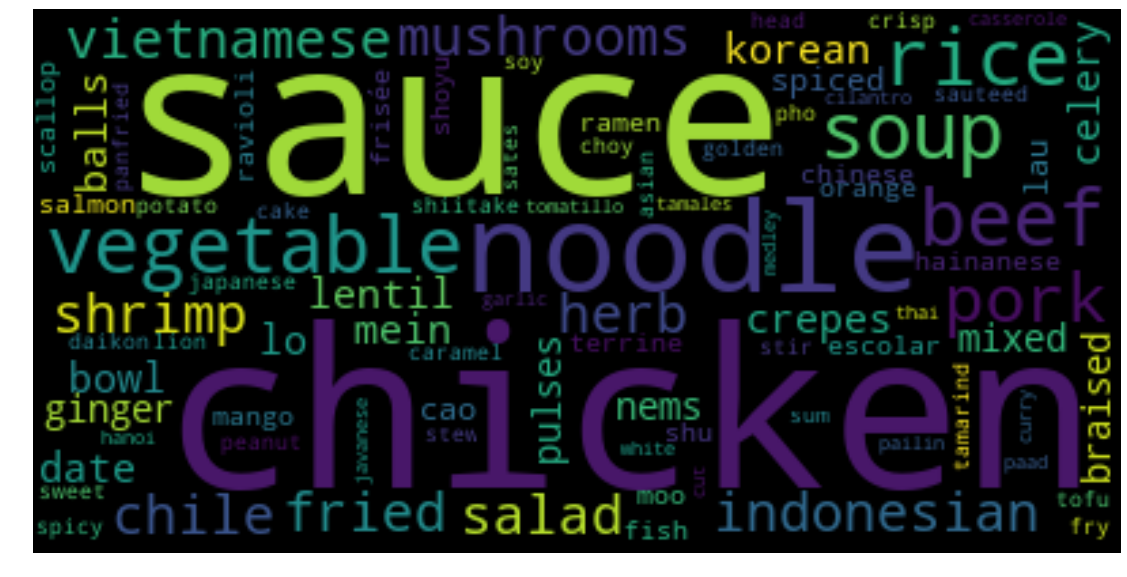

In [1303]:
word_clouder(55)

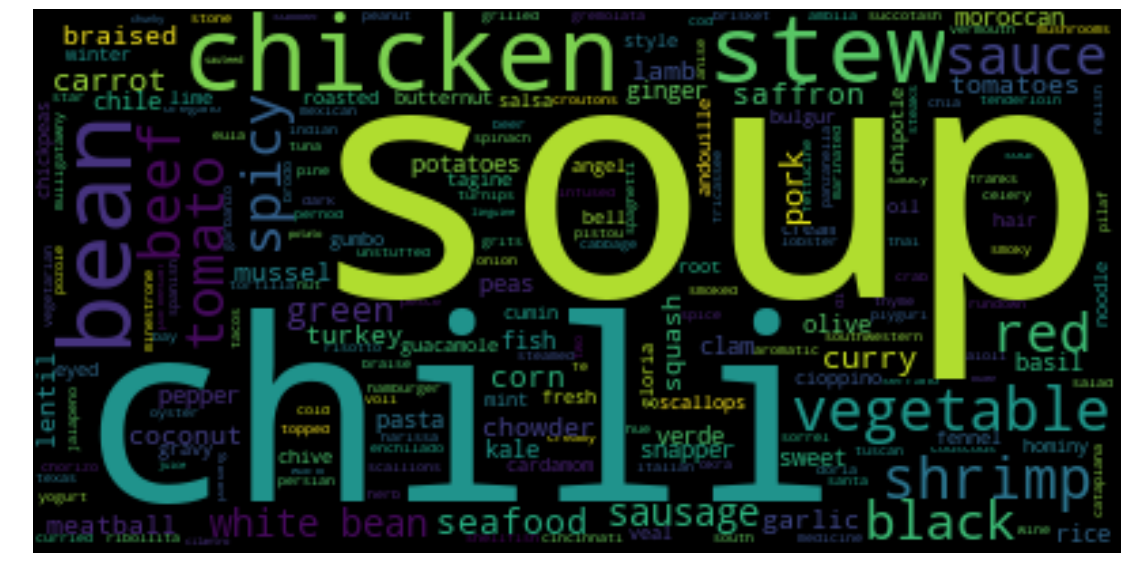

In [1299]:
word_clouder(0)

from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 40)
k_means.fit(X)
y_hat = k_means.predict(X)

In [1245]:
k_means.predict(f)

array([10], dtype=int32)

In [1249]:
cluster_numbers=[]
for number in range(len(y_hat)):
    cluster_numbers.append(y_hat[number])

In [1250]:
recipe['clustered_groups']=pd.DataFrame(cluster_numbers)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1251]:
recipe[recipe['clustered_groups']==10]['title']

13                               Cucumber-Basil Egg Salad 
14                                      Dried Pear Crisps 
17                                            Deviled Ham 
22                                     Pickled Red Onions 
48                                           Stout Floats 
54                                     Tropical Rum Punch 
56                             Blackberry-Raspberry Sauce 
69                                    Honey Mustard Sauce 
73                                              Rumbrosia 
91                 Grilled Corn with Lime-Cilantro Butter 
98                                             Sangria IV 
131                                      Crab-Boil Spices 
133                                    Sephardic Charoset 
136                Breakfast Bowl With Quinoa and Berries 
140                            Lemon-Ginger Frozen Yogurt 
146                                    Quick Tartar Sauce 
147                                Florida Ambrosia Sala

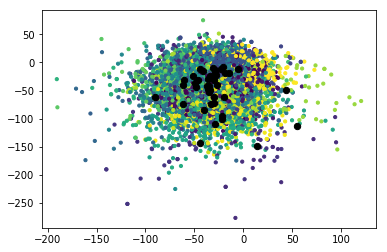

In [1066]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 10)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=40);

In [1067]:
from sklearn.metrics.cluster import calinski_harabaz_score, adjusted_rand_score

In [1068]:
calinski_harabaz_score(X, y_hat)

503.7447605982438

In [1069]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [1070]:
clusterer = KMeansClusterer(30, euclidean_distance,avoid_empty_clusters=True )
clusters = clusterer.cluster(X, True, trace=True)

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


Text(0, 0.5, 'Cluster distance')

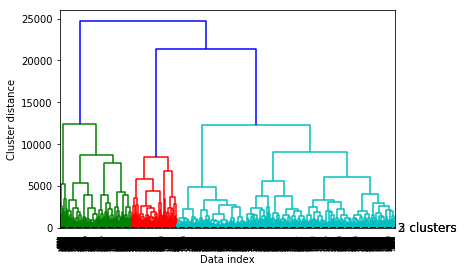

In [1105]:
from scipy.cluster.hierarchy import dendrogram, ward

# use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

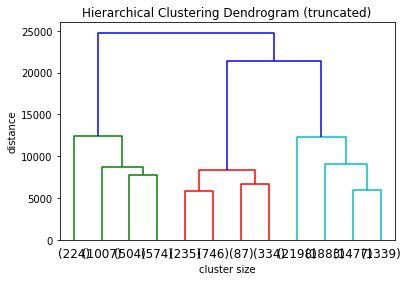

In [1106]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

In [1107]:
k_means_5 = KMeans(n_clusters=5).fit(X)
k_means_10 = KMeans(n_clusters=10).fit(X)
k_means_15 = KMeans(n_clusters=15).fit(X)
k_means_20 = KMeans(n_clusters=20).fit(X)
k_means_25 = KMeans(n_clusters=25).fit(X)

In [1111]:
k_list = [k_means_5,k_means_10,k_means_15,k_means_20,k_means_25,k_means]

In [1112]:
CH_score = []

for  model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabaz_score(X, labels))

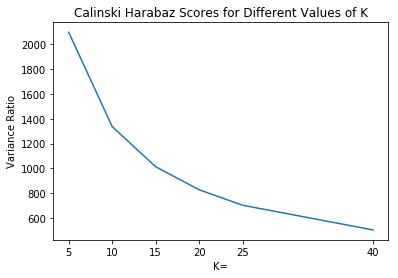

In [1113]:
plt.plot([5, 10, 15, 20, 25,40], CH_score)
plt.xticks([5,10,15,20,25,40])
plt.title("Calinski Harabaz Scores for Different Values of K")
plt.ylabel("Variance Ratio")
plt.xlabel("K=")
plt.show()

In [1174]:
def word_clouder(num):
    test_word=''
    group=recipe[recipe['clustered_groups']==num]['title']
    processed_words=group.apply(lambda x: process_article(x))
    articles_concat = []
    for article in processed_words:
        articles_concat += article
        word_list=Counter(articles_concat).most_common(100)
    
    for word in articles_concat:
        test_word+=' '
        test_word+=word
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(test_word)

# Display the generated image:
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


    return plt.show()

In [1128]:
eighteen=recipe[recipe['clustered_groups']==18]['title']

In [1142]:
one_eight=eighteen.apply(lambda x: process_article(x))

In [1143]:
# created list of words and counts for freqDist counter
articles_concat_18 = []
for article in one_eight:
    articles_concat_18 += article

In [1144]:
word_list=Counter(articles_concat_18).most_common(100)

In [1145]:
#create string of words for word cloud
test_word=''
for word in articles_concat_18:
    test_word+=' '
    test_word+=word

In [1172]:
answer=word_clouder(11)

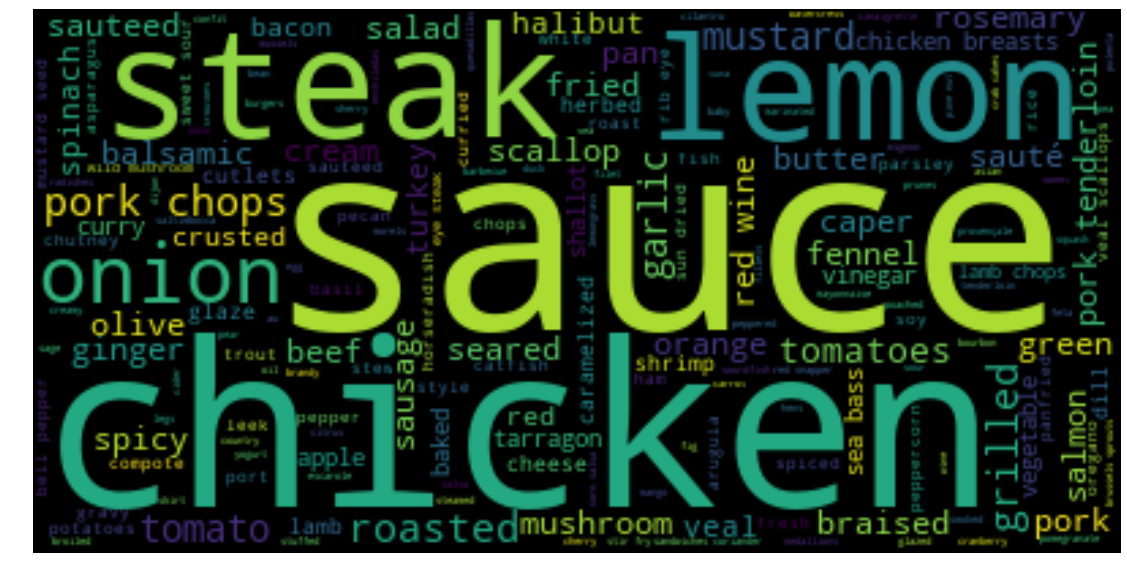

In [1189]:
word_clouder(26)

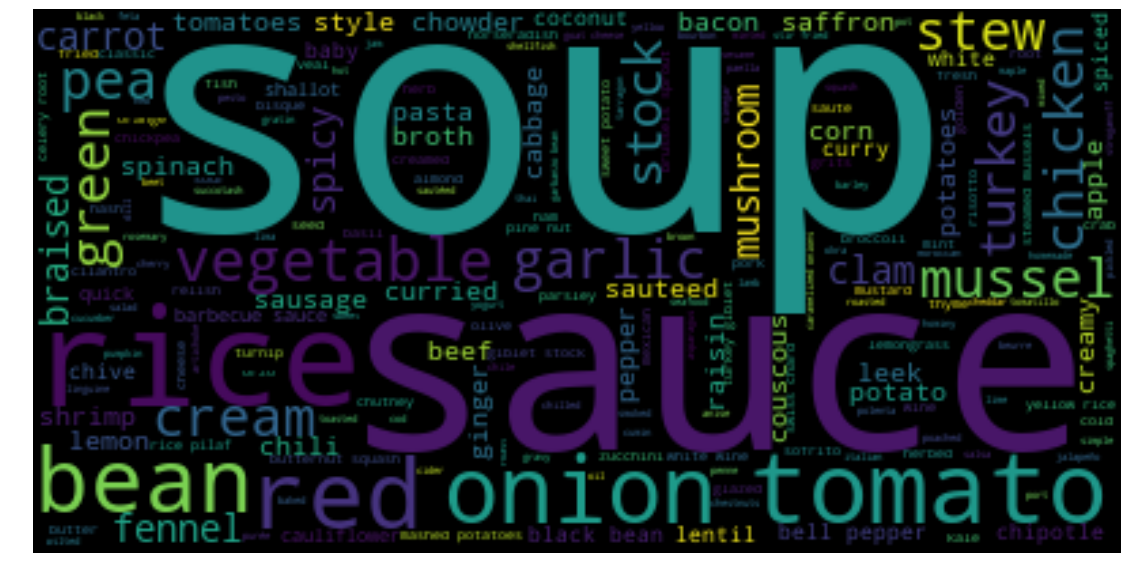

In [1173]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(answer)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
k_means_15.predict

In [ ]:
#model['fish']

In [ ]:
#for word in model.words:
    #print(word, model[word])

In [ ]:
# CBOW model
#model_cb = fasttext.cbow(texts, 'model')
#print(model_cb.words) # list of words in dictionary

In [ ]:
#word_tokenize(texts)

In [ ]:
model_4=Word2Vec(df,min_count=1)

In [ ]:
model_5=Word2Vec(df['processed_ingredients'],min_count=1)

In [ ]:
model_5['pizza']

In [ ]:
model_5.most_similar(['parmesan'])

In [ ]:
df['processed_ingredients']

In [ ]:
model_4.most_similar(['chicken','parmesan'])

In [ ]:
model_3.most_similar(positive=['chicken','parmesan'])

In [ ]:
model_4.most_similar(positive=['parmesan'])

In [ ]:
print (model_4.similarity('syrup', 'bourbon'))
print (model_4.similarity('garlic', 'shallots'))

In [ ]:


from sklearn import metrics
 
import gensim.models as g
import codecs
 
#model="doc2vec/doc2vec.bin"
test_docs="/Users/denisdunn/usda_project"
 
#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000
 
#load model
#m = g.Doc2Vec.load(model)
#test_docs = [ x.strip().split() for x in codecs.open(test_docs, "r", "utf-8").readlines() ]
m=model
print (test_docs)
"""
[['the', 'cardigan', 'welsh', 'corgi'........
"""
 
X=[]
for d in test_docs:
     
    X.append( m.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )
    
 
k=3
 
from sklearn.cluster import Birch
 
brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
brc.fit(X)
 
clusters = brc.predict(X)
 
labels = brc.labels_
 
 
print ("Clusters: ")
print (clusters)
 
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

In [ ]:
test_docs

In [ ]:
model = fasttext.load_model('model.bin')
print(model.words) # list of words in dictionary
print(model['bread']) # get the vector of the word 'king'

In [ ]:
model.nn


In [ ]:
classifier = fasttext.supervised('epicurious', 'model')

In [ ]:
classifier = fasttext.supervised('epicurious', 'model', label_prefix='lasagna')

In [ ]:
gensim.models.keyedvectors.BaseKeyedVectors(175)

In [ ]:
print(x)

In [ ]:

model.skipgram(input='epicurious', output='model', epoch=100, lr=0.7)

In [ ]:
fasttext_nn('lasagna')

In [ ]:
result = classifier.test('/Users/denisdunn/usda_project')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)


In [ ]:
print(result.bin)

In [ ]:
df["Ingredient_join"][1]

In [ ]:
texts = ["whipping cream onions bay leaves whole cloves garlic clove crushed 1/8 ground nutmeg 'pinch dried thyme crumbled shallots minced butter trimmed boneless center pork loin sinew removed 1-inch chunks well chilled eggs purpose flour tawny port dried currants minced 'lettuce leaves 'cracked peppercorns 'minced parsley 'bay leaves 'french bread baguette slices olive oil red onions halved dried currants red wine vinegar canned chicken broth thyme dried crumbled sugar"]
labels = classifier.predict(texts)
print(labels)

# Or with the probability
labels = classifier.predict_proba(texts)
print(labels)

In [ ]:
sims = index[tfidf[vec_lsi]]
print(list(enumerate(sims)))

In [ ]:
X=model_3

In [ ]:
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")

In [ ]:

# training data
 
sentences = [df["Ingredient_join"]]
 
 
# training model
model = Word2Vec(sentences, min_count=1)
 
# get vector data
X = model[model.wv.vocab]
#print (X)
 
#print (model.similarity('sugar', 'sauce'))
 
print (model.similarity('chicken'))
 
#print (model.most_similar(positive=['fish'], negative=[], topn=2))
 
#print (model['the'])
 
print (list(model.wv.vocab))
 
print (len(list(model.wv.vocab)))
 
 
 
 
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(direct_vecNUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.similarities import WmdSimilarity

model = Word2Vec(texts, size=20, min_count=1)  # train word-vectors

index = WmdSimilarity(texts, model)
 # Make query.
query = ['broccoli']
sims = index[query]

In [ ]:
word_vectors = model.wv.vectors

In [ ]:
sims.max()

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
idx =k_means.fit_predict( word_vectors)

In [ ]:
idx.shape

In [ ]:
word_centroid_map = dict(zip( model.wv.index2word, idx ))

In [ ]:
words = list(model.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

In [ ]:
#for cluster in xrange(0,10):

# Print the cluster number

#…………….print "\nCluster %d" % cluster

# Find all of the words for that cluster number, and print them out

words = []

for i in range(0,len(word_centroid_map.values())):

    if( word_centroid_map.values()[i] == cluster ):

        words.append(word_centroid_map.keys()[i])
print(words)

In [ ]:
plt.scatter(idx[:,0],idx[:1], c=8, s=10)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_classifier.fit(tf_idf_data_train, target)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn.decomposition.truncated_svd import TruncatedSVD        
pca = TruncatedSVD(n_components=2)                                
X_reduced_train = pca.fit_transform(index) 